# AI-Image-Detector

In [25]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import cv2

## Data Structure

In [26]:
base_dir = './dataset/'

train_df = pd.read_csv(os.path.join(base_dir, 'train.csv'))
test_df = pd.read_csv(os.path.join(base_dir, 'test.csv'))

In [27]:
print("train_df shape: ", train_df.shape)
print(train_df.head())

train_df shape:  (79950, 3)
   Unnamed: 0                                        file_name  label
0           0  train_data/a6dcb93f596a43249135678dfcfc17ea.jpg      1
1           1  train_data/041be3153810433ab146bc97d5af505c.jpg      0
2           2  train_data/615df26ce9494e5db2f70e57ce7a3a4f.jpg      1
3           3  train_data/8542fe161d9147be8e835e50c0de39cd.jpg      0
4           4  train_data/5d81fa12bc3b4cea8c94a6700a477cf2.jpg      1


In [28]:
print("test_df shape: ", test_df.shape)
print(test_df.head())

test_df shape:  (5540, 1)
                                                  id
0  test_data_v2/1a2d9fd3e21b4266aea1f66b30aed157.jpg
1  test_data_v2/ab5df8f441fe4fbf9dc9c6baae699dc7.jpg
2  test_data_v2/eb364dd2dfe34feda0e52466b7ce7956.jpg
3  test_data_v2/f76c2580e9644d85a741a42c6f6b39c0.jpg
4  test_data_v2/a16495c578b7494683805484ca27cf9f.jpg


In [29]:
# for consistency with the train data
test_df = test_df.rename(columns={'id': 'file_name'})
train_df = train_df.drop(columns=['Unnamed: 0'])

### Modify Image Path

In [30]:
def modify_image_path(df):
    # Modify the file_name to have the full path
    df['file_name'] = df['file_name'].apply(lambda x: os.path.join(base_dir, x))
    return df


train_df = modify_image_path(train_df)
test_df = modify_image_path(test_df)

print(train_df.head())
print(test_df.head())

                                           file_name  label
0  ./dataset/train_data/a6dcb93f596a43249135678df...      1
1  ./dataset/train_data/041be3153810433ab146bc97d...      0
2  ./dataset/train_data/615df26ce9494e5db2f70e57c...      1
3  ./dataset/train_data/8542fe161d9147be8e835e50c...      0
4  ./dataset/train_data/5d81fa12bc3b4cea8c94a6700...      1
                                           file_name
0  ./dataset/test_data_v2/1a2d9fd3e21b4266aea1f66...
1  ./dataset/test_data_v2/ab5df8f441fe4fbf9dc9c6b...
2  ./dataset/test_data_v2/eb364dd2dfe34feda0e5246...
3  ./dataset/test_data_v2/f76c2580e9644d85a741a42...
4  ./dataset/test_data_v2/a16495c578b749468380548...


### Show Sample Images

function taken from https://www.kaggle.com/code/sheemamasood/ai-vs-human-convnextnswintranformers-techpulse

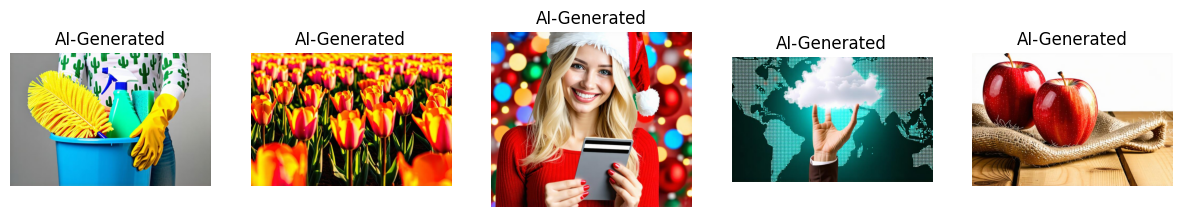

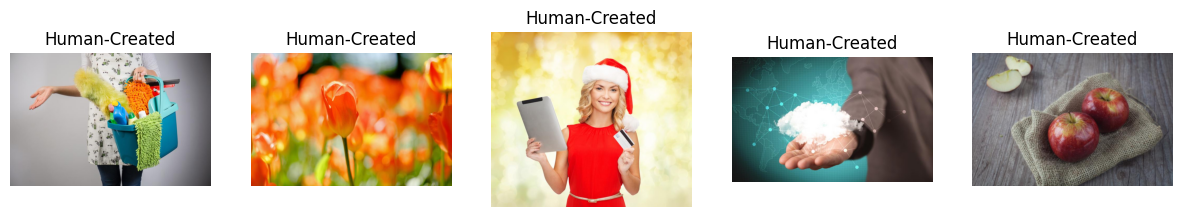

In [32]:
def show_images(df, label, num_images=5):
    sample_images = df[df["label"] == label].sample(num_images, random_state=25)["file_name"].values

    plt.figure(figsize=(15, 5))
    for i, img_path in enumerate(sample_images):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, num_images, i+1)
        plt.imshow(img)
        plt.axis("off")
        plt.title("AI-Generated" if label == 1 else "Human-Created")
        
    plt.show()

# Show AI-Generated Images
show_images(train_df, label=1)

# Show Human-Created Images
show_images(train_df, label=0)

## Exploratory Data Analysis

In [ ]:
print("Checking for missing values in the dataset:\n")

print("Train Data:\n", train_df.isnull().sum())
print("Test Data:\n", test_df.isnull().sum())

print("Checking for duplicates:")

print("Train Data: ", train_df.duplicated().sum())
print("Test Data: ", test_df.duplicated().sum())


Checking for missing values in the dataset:

Train Data:
 file_name    0
label        0
dtype: int64
Test Data:
 file_name    0
dtype: int64
Checking for duplicates:
Train Data:  0
Test Data:  0


In [38]:
print("Checking the distribution of the labels in the train data:")

print(train_df["label"].value_counts())

Checking the distribution of the labels in the train data:
label
1    39975
0    39975
Name: count, dtype: int64


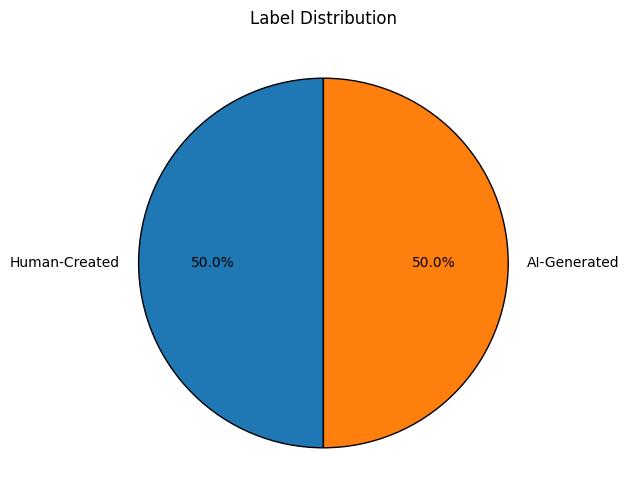

In [40]:
# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(train_df["label"].value_counts(), labels=['Human-Created', 'AI-Generated'], autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Label Distribution')
plt.show()